In [33]:
import pandas as pd
import seaborn as sb
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
#data = joblib.load("/Users/english/Downloads/data.jl")

In [84]:
float('nan')

nan

In [125]:
def correct_gtstate(x):
    if x == '.':
        return None
    return x == '0'

data = pd.read_csv("/Users/english/code/kanpig/experiments/test_rs/hcbench_noref/states.txt", 
                   sep='\t', 
                   names=['GQ', 'SQ', 'State', "GTState"])
data['State'] = data['State'] == 'T'
data['GTState'] = data['GTState'].apply(correct_gtstate)

/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Variant ROC on SQ'), Text(0, 0.5, 'TPR'), Text(0.5, 0, 'FPR')]

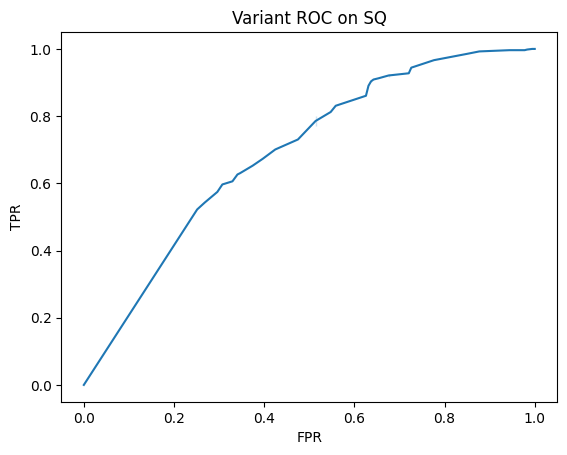

In [126]:
falseposrate_noskill, trueposrate_noskill, _ = roc_curve(data['State'], data['SQ'])
p = sb.lineplot(x=falseposrate_noskill, y=trueposrate_noskill)
p.set(title="Variant ROC on SQ", ylabel="TPR", xlabel="FPR")

/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Correct GT ROC on GQ'),
 Text(0, 0.5, 'TPR'),
 Text(0.5, 0, 'FPR')]

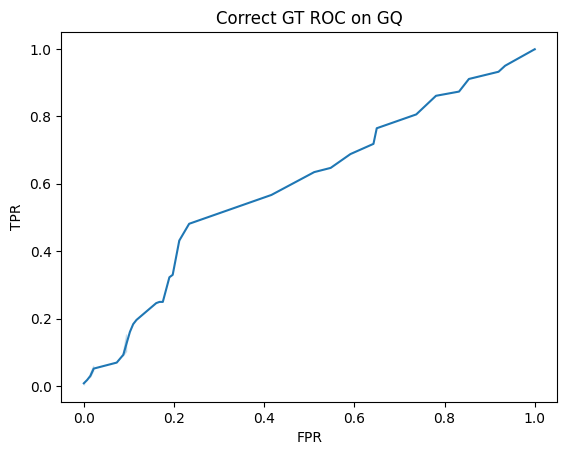

In [121]:
view = data[~data['GTState'].isna()]
falseposrate_noskill, trueposrate_noskill, _ = roc_curve(view['GTState'].astype(bool), view['GQ'])
p = sb.lineplot(x=falseposrate_noskill, y=trueposrate_noskill)
p.set(title="Correct GT ROC on GQ", ylabel="TPR", xlabel="FPR")

/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Correct Genotype ROC on SQ'),
 Text(0, 0.5, 'TPR'),
 Text(0.5, 0, 'FPR')]

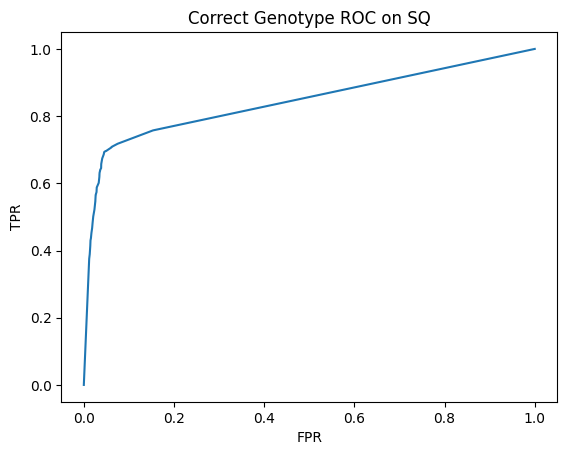

In [73]:
p = sb.lineplot(x=falseposrate_noskill, y=trueposrate_noskill)
p.set(title="Correct Genotype ROC on SQ", ylabel="TPR", xlabel="FPR")

/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Correct Genotype ROC on GQ'),
 Text(0.5, 0, 'Incorrect GT Rate'),
 Text(0, 0.5, 'Correct GT Rate')]

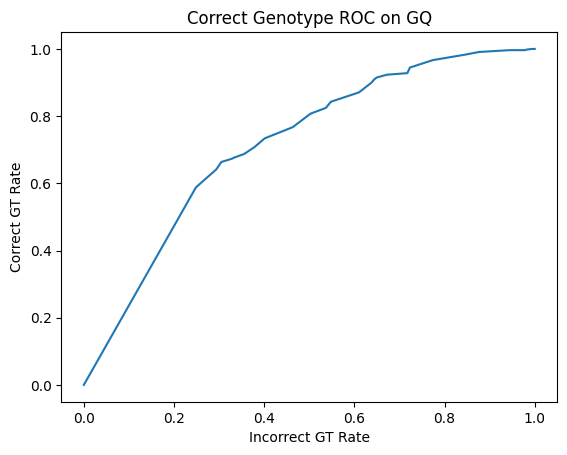

In [52]:
p = sb.lineplot(x=falseposrate_noskill, y=trueposrate_noskill)
p.set(title="Correct Genotype ROC on GQ", xlabel="Incorrect GT Rate", ylabel="Correct GT Rate")

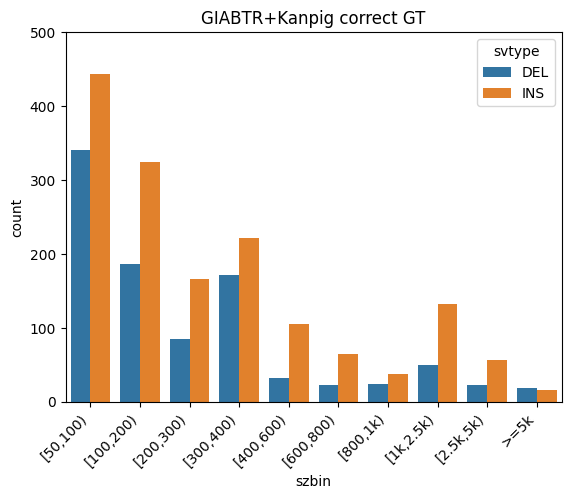

In [12]:
p = sb.countplot(data=data[data['GTMatch']==0], x="szbin", hue="svtype", hue_order=["DEL", "INS"], order=truvari.SZBINS[8:])
plt.xticks(rotation=45, ha='right')
_ = p.set(title="GIABTR+Kanpig correct GT", ylim=(0, 500))

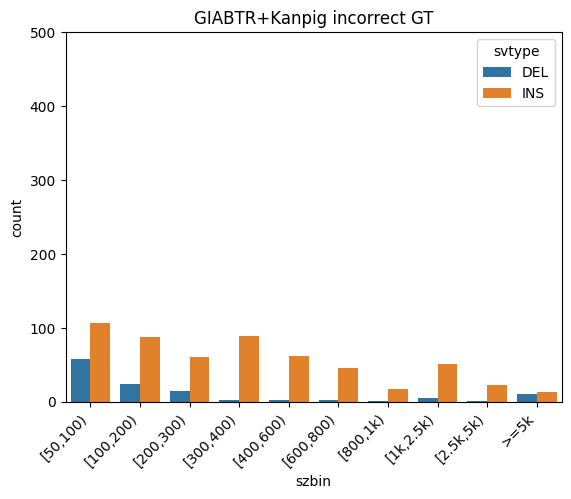

In [14]:
p = sb.countplot(data=data[data['GTMatch']!=0], x="szbin", hue="svtype", hue_order=["DEL", "INS"], order=truvari.SZBINS[8:])
plt.xticks(rotation=45, ha='right')
_ = p.set(title="GIABTR+Kanpig incorrect GT", ylim=(0, 500))

In [19]:
view = data.groupby(['GTMatch', 'szbin', 'svtype'], observed=True).size()

In [21]:
a = view.loc[0.0]
b = view.loc[1.0]

In [28]:
(a + b).unstack().T

szbin,"[40,50)","[50,100)","[100,200)","[200,300)","[300,400)","[400,600)","[600,800)","[800,1k)","[1k,2.5k)","[2.5k,5k)",>=5k
svtype,,,,,,,,,,,
DEL,NaN,377.0,201.0,93.0,174.0,34.0,NaN,NaN,51.0,NaN,21.0
INS,NaN,512.0,394.0,218.0,305.0,156.0,107.0,55.0,172.0,72.0,17.0


In [32]:
(a / (a + b)).unstack().T.round(3)[truvari.SZBINS[8:]]

szbin,"[50,100)","[100,200)","[200,300)","[300,400)","[400,600)","[600,800)","[800,1k)","[1k,2.5k)","[2.5k,5k)",>=5k
svtype,,,,,,,,,,
DEL,0.905,0.925,0.914,0.989,0.941,NaN,NaN,0.980,NaN,0.857
INS,0.867,0.822,0.761,0.725,0.673,0.607,0.691,0.767,0.778,0.941
